<a href="https://colab.research.google.com/github/EshaM18/EshaM18/blob/main/Password_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  # type: ignore
from math import log2
from difflib import SequenceMatcher
import os
import collections
import matplotlib.pyplot as plt


In [ ]:
# Paths to datasets
dataset_paths = [
    "/content/ChatGPT.txt",
    "/content/Gemini_Passwords.txt",
    "/content/ClaudeAItxt.txt",
    "/content/Mistral_AI.txt"
]

In [ ]:
# Load datasets
datasets = []
for path in dataset_paths:
    if os.path.exists(path):
        with open(path, "r") as f:
            passwords = [line.strip() for line in f if line.strip()]
            datasets.append(passwords)
    else:
        print(f"Warning: {path} not found.")
        datasets.append([])

In [ ]:
# === Entropy (Shannon) Analysis ===
def shannon_entropy(password):
    if not password:
        return 0
    probs = [password.count(c) / len(password) for c in set(password)]
    return -sum(p * log2(p) for p in probs)

In [ ]:
entropy_stats = []
for dataset in datasets:
    entropies = [shannon_entropy(p) for p in dataset if p]
    if entropies:
        entropy_stats.append({
            "mean_entropy": round(np.mean(entropies), 4),
            "min_entropy": round(min(entropies), 4),
            "max_entropy": round(max(entropies), 4)
        })
    else:
        entropy_stats.append({
            "mean_entropy": 0,
            "min_entropy": 0,
            "max_entropy": 0
        })

In [ ]:
# === Levenshtein Similarity (average pairwise) ===
def levenshtein_ratio(s1, s2):
    return SequenceMatcher(None, s1, s2).ratio()

In [ ]:
def average_pairwise_similarity(passwords):
    if len(passwords) < 2:
        return 1.0
    similarities = []
    for i in range(len(passwords)):
        for j in range(i + 1, len(passwords)):
            sim = levenshtein_ratio(passwords[i], passwords[j])
            similarities.append(sim)
    return round(np.mean(similarities), 4)

In [ ]:
levenshtein_scores = [average_pairwise_similarity(pwds) for pwds in datasets]

In [ ]:
# === Most Frequent Password ===
most_frequent_passwords = []
for dataset in datasets:
    if dataset:
        counter = collections.Counter(dataset)
        most_common = counter.most_common(1)[0]
        most_frequent_passwords.append({
            "password": most_common[0],
            "count": most_common[1]
        })
    else:
        most_frequent_passwords.append({"password": None, "count": 0})

In [ ]:
# === Final Report ===
model_names = ["ChatGPT", "Gemini", "Claude", "Mistral"]
for i, model in enumerate(model_names):
    print(f"\n=== {model} ===")
    print(f"Mean Entropy       : {entropy_stats[i]['mean_entropy']}")
    print(f"Min Entropy        : {entropy_stats[i]['min_entropy']}")
    print(f"Max Entropy        : {entropy_stats[i]['max_entropy']}")
    print(f"Avg Pairwise Similarity (Levenshtein): {levenshtein_scores[i]}")
    print(f"Most Frequent Password : {most_frequent_passwords[i]['password']}")
    print(f"Occurrence Count       : {most_frequent_passwords[i]['count']}")


=== ChatGPT ===
Mean Entropy       : 3.36
Min Entropy        : 2.1867
Max Entropy        : 3.7736
Avg Pairwise Similarity (Levenshtein): 0.2601
Most Frequent Password : RiverValley72%
Occurrence Count       : 2

=== Gemini ===
Mean Entropy       : 3.4339
Min Entropy        : 2.6464
Max Entropy        : 4.0875
Avg Pairwise Similarity (Levenshtein): 0.2102
Most Frequent Password : RoughSeas$4
Occurrence Count       : 3

=== Claude ===
Mean Entropy       : 3.6571
Min Entropy        : 2.9056
Max Entropy        : 4.1066
Avg Pairwise Similarity (Levenshtein): 0.2792
Most Frequent Password : Lighthouse4$Harbor
Occurrence Count       : 4

=== Mistral ===
Mean Entropy       : 3.5861
Min Entropy        : 2.585
Max Entropy        : 4.1427
Avg Pairwise Similarity (Levenshtein): 0.2861
Most Frequent Password : Adventure@7654!
Occurrence Count       : 4


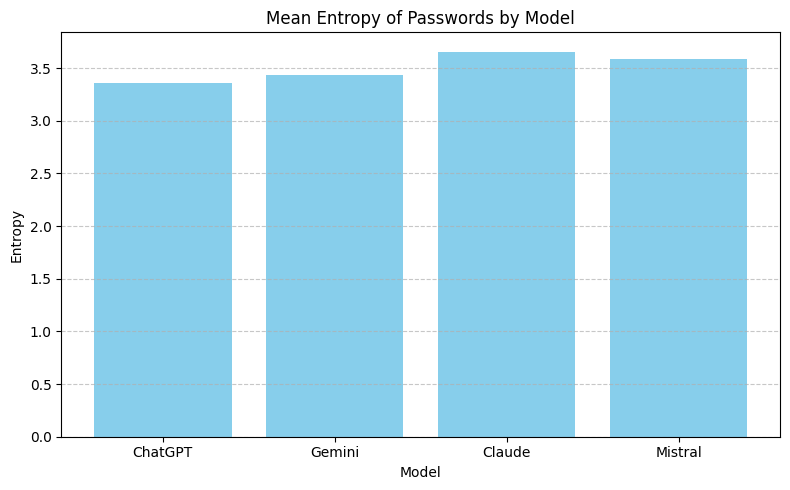

In [ ]:
# Plot 1: Mean Entropy
mean_entropy_values = [e["mean_entropy"] for e in entropy_stats]
plt.figure(figsize=(8, 5))
plt.bar(model_names, mean_entropy_values, color='skyblue')
plt.title("Mean Entropy of Passwords by Model")
plt.ylabel("Entropy")
plt.xlabel("Model")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

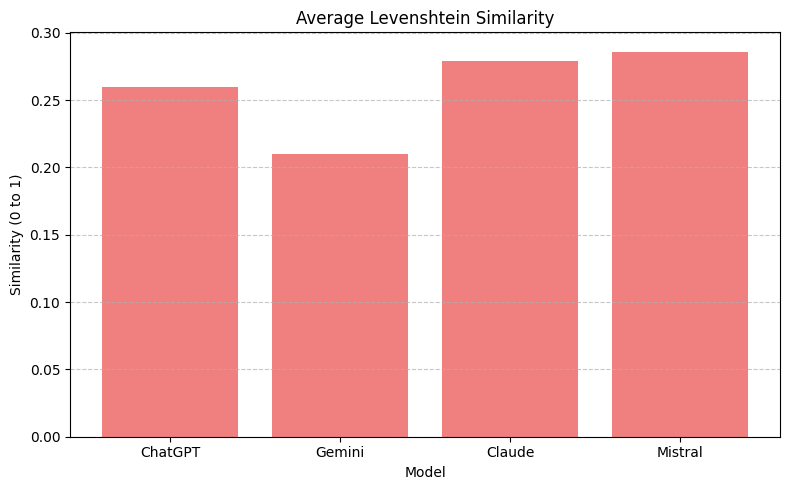

In [ ]:
# Plot 2: Levenshtein Similarity
plt.figure(figsize=(8, 5))
plt.bar(model_names, levenshtein_scores, color='lightcoral')
plt.title("Average Levenshtein Similarity")
plt.ylabel("Similarity (0 to 1)")
plt.xlabel("Model")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

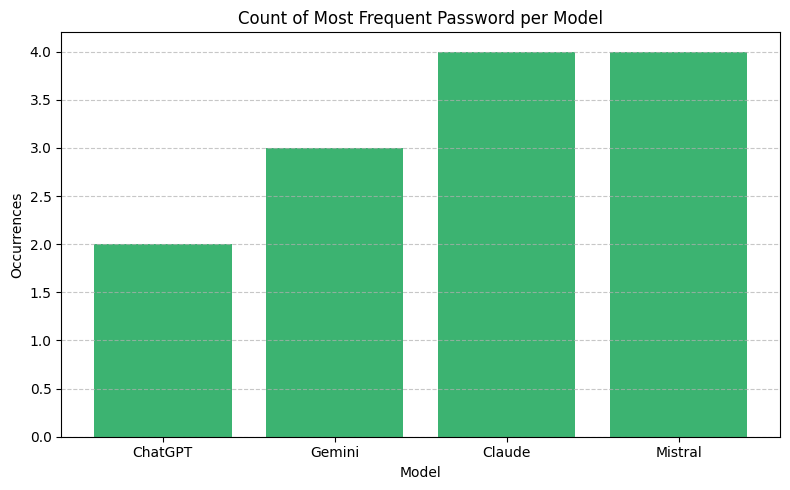

In [ ]:
# Plot 3: Most Frequent Password Count
freq_counts = [m["count"] for m in most_frequent_passwords]
plt.figure(figsize=(8, 5))
plt.bar(model_names, freq_counts, color='mediumseagreen')
plt.title("Count of Most Frequent Password per Model")
plt.ylabel("Occurrences")
plt.xlabel("Model")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
